In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE



file_path = "/Users/raghavsharma/desktop/loan_default_predication_kaggle.csv"

df = pd.read_csv(file_path)

In [33]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [6]:
#Names of the columns
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [7]:
# Shape of the dataset
print(df.shape)

# First 5 rows
print(df.head(5))



(255347, 18)
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      

In [8]:
# Data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
print(df.isnull().sum)

<bound method DataFrame.sum of         LoanID    Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0        False  False   False       False        False           False   
1        False  False   False       False        False           False   
2        False  False   False       False        False           False   
3        False  False   False       False        False           False   
4        False  False   False       False        False           False   
...        ...    ...     ...         ...          ...             ...   
255342   False  False   False       False        False           False   
255343   False  False   False       False        False           False   
255344   False  False   False       False        False           False   
255345   False  False   False       False        False           False   
255346   False  False   False       False        False           False   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        

In [10]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)


LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64


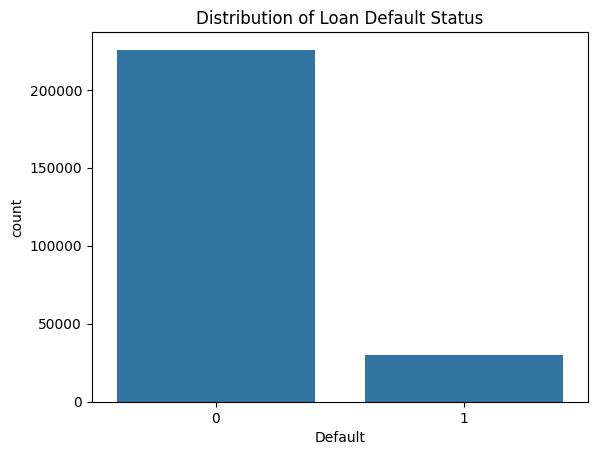

Default
0    225694
1     29653
dtype: int64


In [11]:
#Distribution of the Target Variable (Default)

#Why do we do this? We want to know if most of the loans are "good" loans (not defaulted) or "bad" loans (defaulted). 
# If we have way more loans that didn’t default, the model might get biased towards predicting "no default" because that’s what it’s mostly seeing.

sns.countplot(x='Default', data=df)
plt.title('Distribution of Loan Default Status')
plt.show()

default_grouped = df.groupby('Default').size()

#0 indicates not default (good)
#1 indicates default (bad)

# Print the result
print(default_grouped)

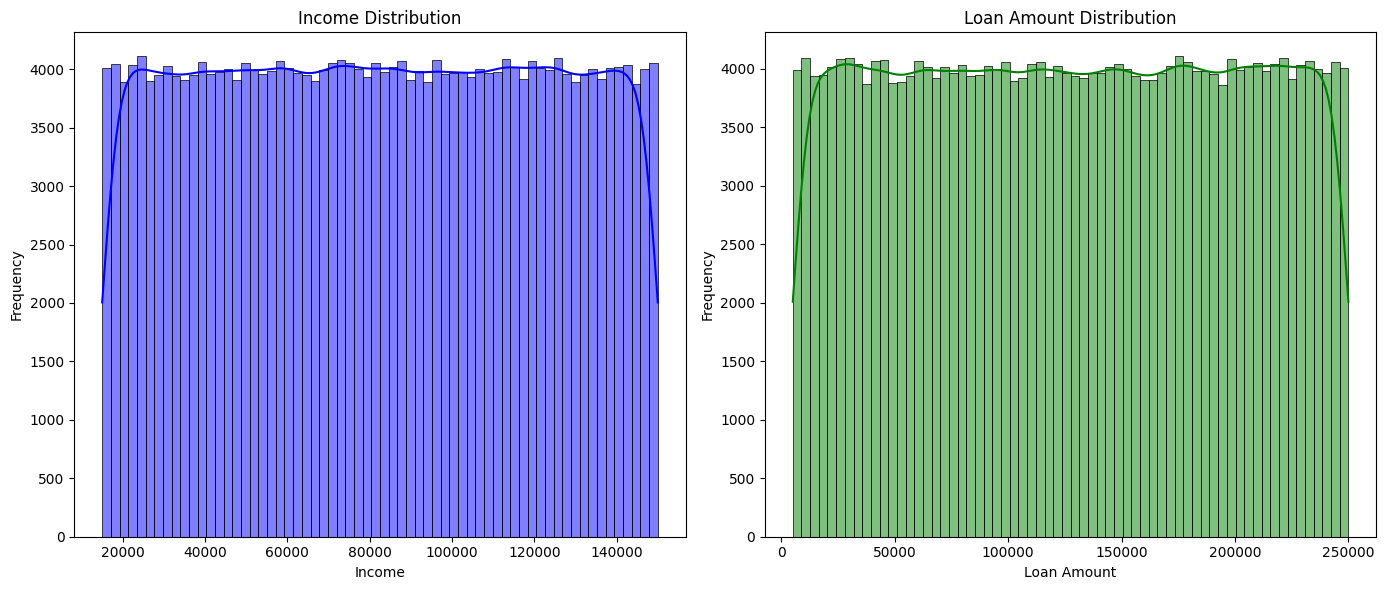

In [12]:
#Univariate Analysis of Continuous Features


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Applicant Income Distribution
sns.histplot(df['Income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Income Distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

# Plot for Loan Amount Distribution
sns.histplot(df['LoanAmount'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Loan Amount Distribution')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


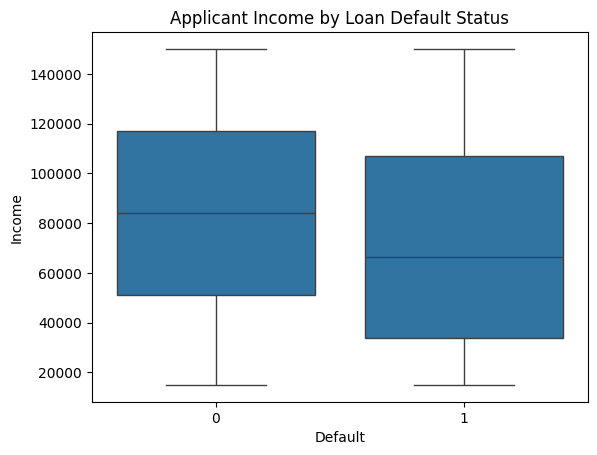

In [13]:
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Applicant Income by Loan Default Status')
plt.show()


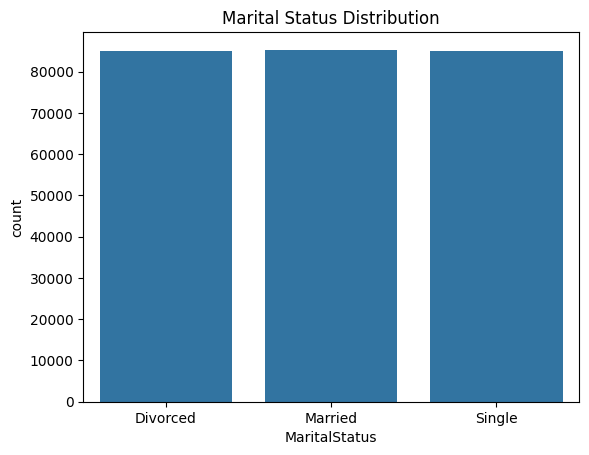

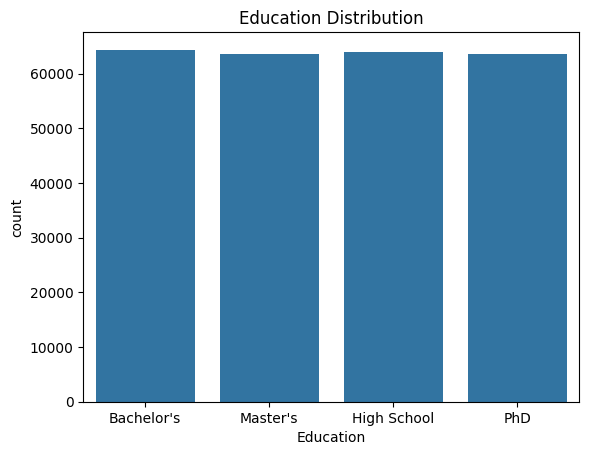

In [14]:
#Analysis of the Categorical Categories

sns.countplot(x='MaritalStatus', data=df)
plt.title('Marital Status Distribution')
plt.show()

sns.countplot(x='Education', data=df)
plt.title('Education Distribution')
plt.show()

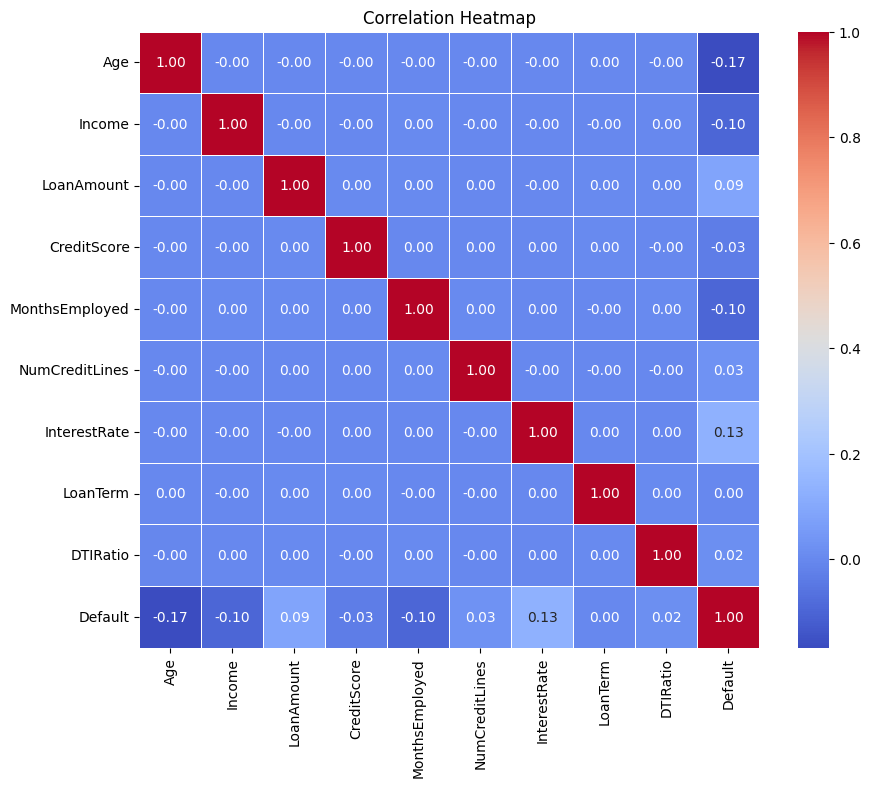

In [15]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Now calculate the correlation of numeric columns
corr = df_numeric.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


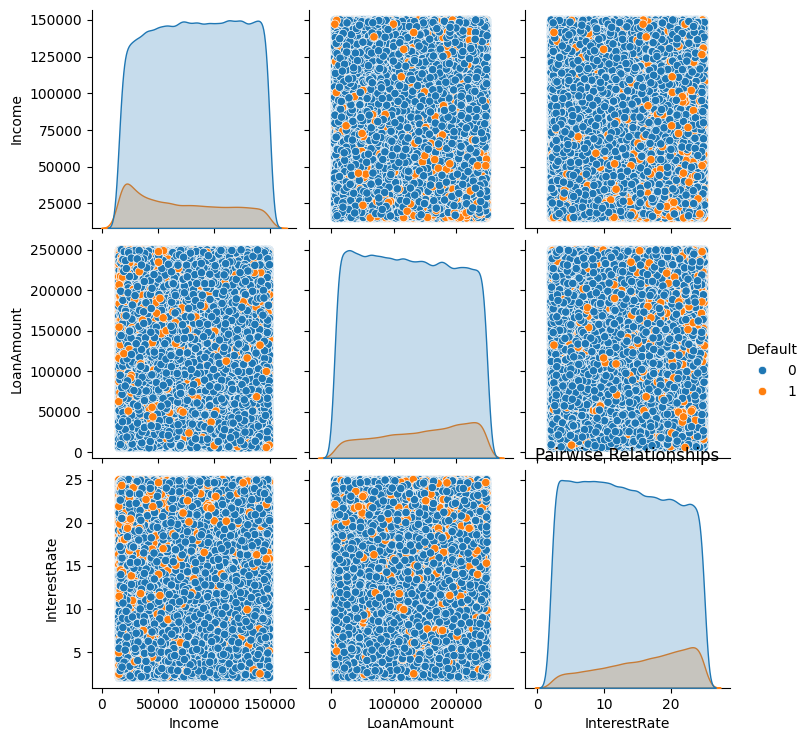

In [16]:
sns.pairplot(df[['Income', 'LoanAmount', 'InterestRate', 'Default']], hue='Default')
plt.title('Pairwise Relationships')
plt.show()

In [30]:
#In the dataset, the column LoanID is a unique identifier for each loan application and does not carry any meaningful information that could help the model 
# predict whether a loan will default or not.

#The correct course of action is to drop the column before the processing of the data.

df.drop(columns=['LoanID'], inplace=True)

print(df.head(5))

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Default  Education_encoded  \
0         15.23        36      0.44        0                  0   
1          4.81        60      0.68        0                  0   
2         21.17        24      0.31        1                  0   
3          7.07        24      0.23        0                  0   
4          6.51        48      0.73        0                  0   

   EmploymentType_encoded  MaritalStatus_encoded  HasMortgage_encoded  \
0                       0                      0                    0   


Default Rate by Education Level:
 Education
High School    0.128789
Bachelor's     0.121011
Master's       0.108717
PhD            0.105860
Name: Default, dtype: float64


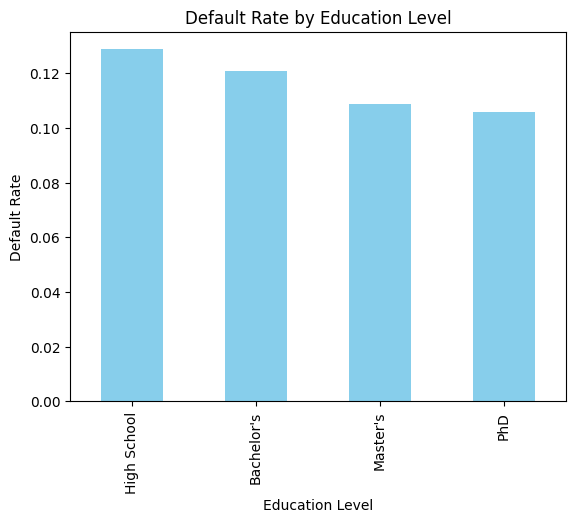

Default Rate by Income Bracket:
 IncomeBracket
0-20k      0.273148
20-40k     0.169422
40-60k     0.118696
60-80k     0.102375
80-100k    0.097444
100k+      0.091038
Name: Default, dtype: float64


/var/folders/vp/lrl181p11fb_10vhrnl_2v300000gn/T/ipykernel_98337/4052293610.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default_rate = df.groupby('IncomeBracket')['Default'].mean()


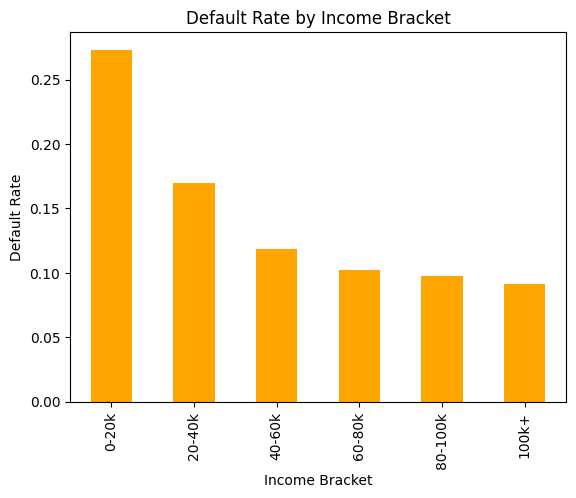

Default Rate by Loan Amount Bracket:
 LoanAmountBracket
0-5k      1.000000
5-10k     0.070528
10-20k    0.076812
20-30k    0.080486
30-40k    0.081619
40k+      0.122455
Name: Default, dtype: float64


/var/folders/vp/lrl181p11fb_10vhrnl_2v300000gn/T/ipykernel_98337/4052293610.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_default_rate = df.groupby('LoanAmountBracket')['Default'].mean()


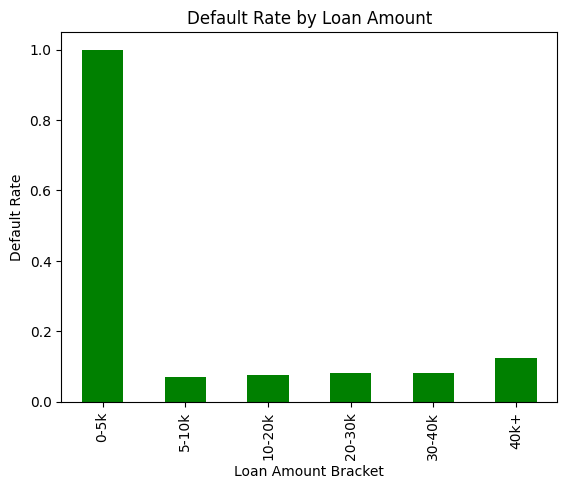

Default Rate by Employment Type:
 EmploymentType
Unemployed       0.135529
Part-time        0.119652
Self-employed    0.114620
Full-time        0.094634
Name: Default, dtype: float64


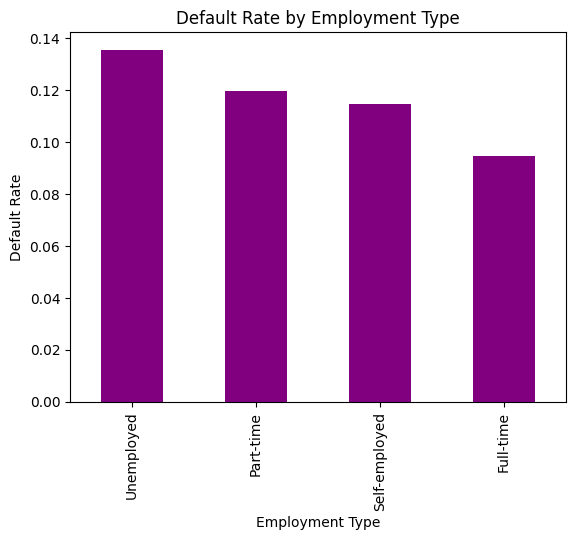

Default Rate by Co-Signer Presence:
 HasCoSigner
No     0.128661
Yes    0.103601
Name: Default, dtype: float64


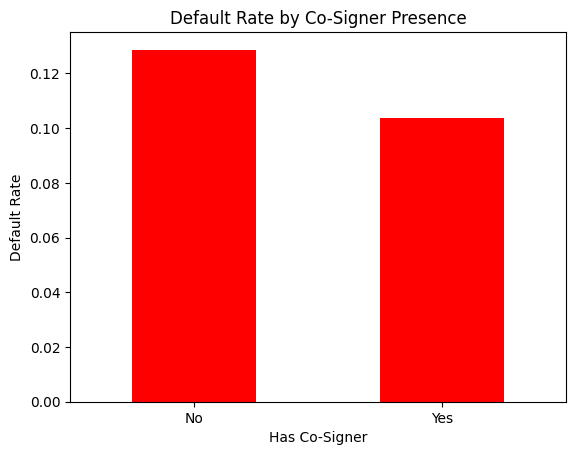

In [31]:
# Group by education and calculate default rate

file_path = "/Users/raghavsharma/desktop/loan_default_predication_kaggle.csv"

df = pd.read_csv(file_path) #Putting this here so that it does not confuse the df with the one which has encodings (from categorical values to numerical ones)
education_default_rate = df.groupby('Education')['Default'].mean().sort_values(ascending=False)
print("Default Rate by Education Level:\n", education_default_rate)

# Visualization
education_default_rate.plot(kind='bar', title='Default Rate by Education Level', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()

# Create income bins
df['IncomeBracket'] = pd.cut(df['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000, np.inf], 
                             labels=['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100k+'])

# Group by income bracket
income_default_rate = df.groupby('IncomeBracket')['Default'].mean()
print("Default Rate by Income Bracket:\n", income_default_rate)

# Visualization
income_default_rate.plot(kind='bar', title='Default Rate by Income Bracket', color='orange')
plt.xlabel('Income Bracket')
plt.ylabel('Default Rate')
plt.show()

# Create loan amount bins
df['LoanAmountBracket'] = pd.cut(df['LoanAmount'], bins=[0, 5000, 10000, 20000, 30000, 40000, np.inf],
                                 labels=['0-5k', '5-10k', '10-20k', '20-30k', '30-40k', '40k+'])

# Group by loan amount bracket
loan_default_rate = df.groupby('LoanAmountBracket')['Default'].mean()
print("Default Rate by Loan Amount Bracket:\n", loan_default_rate)

# Visualization
loan_default_rate.plot(kind='bar', title='Default Rate by Loan Amount', color='green')
plt.xlabel('Loan Amount Bracket')
plt.ylabel('Default Rate')
plt.show()

# Group by employment type
employment_default_rate = df.groupby('EmploymentType')['Default'].mean().sort_values(ascending=False)
print("Default Rate by Employment Type:\n", employment_default_rate)

# Visualization
employment_default_rate.plot(kind='bar', title='Default Rate by Employment Type', color='purple')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate')
plt.show()

# Group by co-signer presence
cosigner_default_rate = df.groupby('HasCoSigner')['Default'].mean()
print("Default Rate by Co-Signer Presence:\n", cosigner_default_rate)

# Visualization
cosigner_default_rate.plot(kind='bar', title='Default Rate by Co-Signer Presence', color='red')
plt.xlabel('Has Co-Signer')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()



In [32]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns that are of object dtype
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_cols:
    # Apply encoding
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop original categorical columns after encoding
df.drop(columns=categorical_cols, inplace=True)

# Verify data types again
print(df.dtypes)

LoanID                      object
Age                          int64
Income                       int64
LoanAmount                   int64
CreditScore                  int64
MonthsEmployed               int64
NumCreditLines               int64
InterestRate               float64
LoanTerm                     int64
DTIRatio                   float64
Default                      int64
IncomeBracket             category
LoanAmountBracket         category
Education_encoded            int64
EmploymentType_encoded       int64
MaritalStatus_encoded        int64
HasMortgage_encoded          int64
HasDependents_encoded        int64
LoanPurpose_encoded          int64
HasCoSigner_encoded          int64
dtype: object


In [33]:
# Verify data types again

df.drop(columns=['LoanID'], inplace=True)
df.drop(columns=['IncomeBracket'], inplace=True)
df.drop(columns=['LoanAmountBracket'], inplace=True)

print(df.dtypes)

Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Default                     int64
Education_encoded           int64
EmploymentType_encoded      int64
MaritalStatus_encoded       int64
HasMortgage_encoded         int64
HasDependents_encoded       int64
LoanPurpose_encoded         int64
HasCoSigner_encoded         int64
dtype: object


In [34]:
df = df.apply(pd.to_numeric, errors='coerce')

# Verify data types again
print(df.dtypes)

Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Default                     int64
Education_encoded           int64
EmploymentType_encoded      int64
MaritalStatus_encoded       int64
HasMortgage_encoded         int64
HasDependents_encoded       int64
LoanPurpose_encoded         int64
HasCoSigner_encoded         int64
dtype: object


Processing and modelling the data

In [35]:
X = df.drop('Default', axis=1) #feature variables
y = df['Default'] #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train: The features or input data the model learns from during training.
#Y_train: The correct outcomes or labels corresponding to X_train that the model aims to predict.
#X_test: The new, unseen data the model uses to make predictions after training.
#Y_test: The actual correct outcomes for the test data, used to evaluate the model's performance.
#y_pred: The predictions made by the model for the test data, based on what it learned.



We will be utilizing three different algorithms to analyzw this data - XgBoost, RandomForest and neural networks using deep learning.

XG Boost (Extreme Gradient Boosting)

Why it's used:

High Predictive Power: XGBoost is one of the most powerful algorithms for structured/tabular data. It is designed to optimize performance and handles complex relationships well.
Handles Imbalanced Data: Loan default datasets are often imbalanced (e.g., more loans are approved than defaulted). XGBoost uses techniques like weighted loss functions to deal with this.


Feature Importance: It provides insights into which features are most important for predicting defaults, which can help with feature selection and model interpretability.
Handles Missing Data: XGBoost can handle missing values directly without requiring extensive preprocessing.
Fast and Efficient: It's optimized for speed and memory usage, making it suitable for large datasets.


Challenges it addresses:

Non-linear relationships between features and target variables.

High dimensionality of data (e.g., many features like income, loan amount, credit history, etc.).
Imbalanced datasets.


In [36]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)


# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%\n")

classification_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(classification_report_xgb)

confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_xgb)

Accuracy: 88.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070

Confusion Matrix:
[[44737   433]
 [ 5396   504]]


In [37]:
print(df.isna().sum())
print(X_train.isna().sum())



Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Default                   0
Education_encoded         0
EmploymentType_encoded    0
MaritalStatus_encoded     0
HasMortgage_encoded       0
HasDependents_encoded     0
LoanPurpose_encoded       0
HasCoSigner_encoded       0
dtype: int64
Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Education_encoded         0
EmploymentType_encoded    0
MaritalStatus_encoded     0
HasMortgage_encoded       0
HasDependents_encoded     0
LoanPurpose_encoded       0
HasCoSigner_encoded       0
dtype: int64


Using SMOTE for handling imbalanced classes

SMOTE (Synthetic Minority Over-sampling Technique) is used in ML models to address class imbalance. It generates synthetic samples for the minority class by interpolating between existing data points, helping the model better learn the characteristics of the minority class and avoid bias toward the majority class. This leads to more balanced and accurate predictions.


Now, we can use SMOTE and then train the model to compare the results

In [64]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model_smote = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)


# Training the model
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Making predictions
y_pred_xgb_smote = xgb_model_smote.predict(X_test)


# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_smote)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%\n")

classification_report_xgb_smote = classification_report(y_test, y_pred_xgb_smote)
print("Classification Report:")
print(classification_report_xgb_smote)

confusion_matrix_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_xgb_smote)


/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 86.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     45170
           1       0.33      0.20      0.25      5900

    accuracy                           0.86     51070
   macro avg       0.62      0.57      0.59     51070
weighted avg       0.83      0.86      0.85     51070

Confusion Matrix:
[[42802  2368]
 [ 4733  1167]]


Random Forest


Strengths:

Random forests are an ensemble method that typically performs very well for classification tasks.

It handles overfitting better than individual decision trees, is less sensitive to noise, and works well with both categorical and numerical data.

Very easy to interpret and understand.


Considerations:

Computationally expensive (but less so than deep learning models).

May not capture complex relationships as well as neural networks in some cases.

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%\n")

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(classification_report_rf)

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_rf)

Accuracy: 88.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070

Confusion Matrix:
[[45013   157]
 [ 5623   277]]


Using SMOTE

In [67]:
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"Accuracy: {accuracy_rf_smote * 100:.2f}%\n")

classification_report_rf_smote = classification_report(y_test, y_pred_rf_smote)
print("Classification Report:")
print(classification_report_rf_smote)

confusion_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix_rf_smote)

Accuracy: 83.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     45170
           1       0.25      0.23      0.24      5900

    accuracy                           0.83     51070
   macro avg       0.58      0.57      0.57     51070
weighted avg       0.83      0.83      0.83     51070

Confusion Matrix:
[[41113  4057]
 [ 4550  1350]]


Deep Learning

Strengths:

High Predictive Power: Deep learning models can identify intricate patterns and dependencies in the data that traditional models might miss. For example, it can learn subtle interactions between features like income, credit history, and loan amount.

Scalability: Deep learning models work well with large and complex datasets, such as datasets with hundreds of features or millions of records. They can scale effectively as data volume grows.

Robustness: Deep learning is versatile and can handle structured (numerical and categorical) and unstructured data (text, images). For example, if you want to include text data like loan application descriptions, deep learning models like LSTMs or transformers can process them effectively.

Custom Loss Functions: You can design loss functions tailored to the business problem, such as minimizing the financial loss due to incorrect predictions or focusing on reducing false negatives (e.g., correctly identifying defaults to minimize risk).

In [38]:
# Build the deep learning model
model_dl = Sequential()
model_dl.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_dl.add(Dense(32, activation='relu'))
model_dl.add(Dense(1, activation='sigmoid'))

# Compile the model
model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_dl.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/Users/raghavsharma/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-24 21:48:17.792971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5107/5107 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.7945 - loss: 532.3774 - val_accuracy: 0.8866 - val_loss: 339.5499
Epoch 2/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7957 - loss: 345.1607 - val_accuracy: 0.8874 - val_loss: 183.8483
Epoch 3/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7950 - loss: 520.8227 - val_accuracy: 0.8864 - val_loss: 1084.8123
Epoch 4/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7959 - loss: 912.9944 - val_accuracy: 0.8587 - val_loss: 1648.6088
Epoch 5/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7919 - loss: 1532.6256 - val_accuracy: 0.6873 - val_loss: 2178.9028
Epoch 6/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7959 - loss: 2580.2424 - val_accuracy: 0.7001 - val_loss: 5032.6133
Epoch 7/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.7961 - loss: 3840.2549 - val_accuracy: 0.7397 - val_loss: 5234.9028
Epoch 8/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - a

In [69]:
# Predict the labels for the test set
y_pred_dl = model_dl.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate Accuracy
accuracy_dl = accuracy_score(y_test, y_pred_dl)
print(f"Accuracy: {accuracy_dl * 100:.2f}%\n")

# Classification Report
classification_report_dl = classification_report(y_test, y_pred_dl)
print("Classification Report:")
print(classification_report_dl)

# Confusion Matrix
confusion_matrix_dl = confusion_matrix(y_test, y_pred_dl)
print("Confusion Matrix:")
print(confusion_matrix_dl)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step
Accuracy: 88.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070

Confusion Matrix:
[[45170     0]
 [ 5900     0]]


/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Using SMOTE

In [70]:
model_dl_smote = Sequential()
model_dl_smote.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))
model_dl_smote.add(Dense(32, activation='relu'))
model_dl_smote.add(Dense(1, activation='sigmoid'))

# Compile the model
model_dl_smote.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_dl_smote.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5107/5107 ━━━━━━━━━━━━━━━━━━━━ 3s 493us/step - accuracy: 0.8048 - loss: 116.6223 - val_accuracy: 0.8866 - val_loss: 156.3531
Epoch 2/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.8064 - loss: 53.8342 - val_accuracy: 0.7927 - val_loss: 6.7075
Epoch 3/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.8080 - loss: 32.0582 - val_accuracy: 0.8866 - val_loss: 27.0055
Epoch 4/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step - accuracy: 0.8078 - loss: 16.5948 - val_accuracy: 0.8866 - val_loss: 18.8274
Epoch 5/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.8093 - loss: 10.2385 - val_accuracy: 0.3781 - val_loss: 17.2239
Epoch 6/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step - accuracy: 0.8102 - loss: 6.0459 - val_accuracy: 0.7939 - val_loss: 2.2633
Epoch 7/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - accuracy: 0.8111 - loss: 3.1574 - val_accuracy: 0.8866 - val_loss: 4.0171
Epoch 8/10
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - accuracy: 0.8167 -

In [71]:
# Predict the labels for the test set
y_pred_dl_smote = model_dl_smote.predict(X_test)
y_pred_dl_smote = (y_pred_dl_smote > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate Accuracy
accuracy_dl_smote = accuracy_score(y_test, y_pred_dl_smote)
print(f"Accuracy: {accuracy_dl * 100:.2f}%\n")

# Classification Report
classification_report_dl_smote = classification_report(y_test, y_pred_dl_smote)
print("Classification Report:")
print(classification_report_dl_smote)

# Confusion Matrix
confusion_matrix_dl_smote = confusion_matrix(y_test, y_pred_dl_smote)
print("Confusion Matrix:")
print(confusion_matrix_dl_smote)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
Accuracy: 88.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       1.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.94      0.50      0.47     51070
weighted avg       0.90      0.88      0.83     51070

Confusion Matrix:
[[45170     0]
 [ 5893     7]]


We can now compare the results from all the models - XGB Boost Model, RandomForest Model, Deep Learning Model

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert classification report and confusion matrix to strings (new names)
classification_report_xgb_1 = str(classification_report(y_test, y_pred_xgb))
classification_report_rf_1 = str(classification_report(y_test, y_pred_rf))
classification_report_dl_1 = str(classification_report(y_test, y_pred_dl))

confusion_matrix_xgb_1 = str(confusion_matrix(y_test, y_pred_xgb))
confusion_matrix_rf_1 = str(confusion_matrix(y_test, y_pred_rf))
confusion_matrix_dl_1 = str(confusion_matrix(y_test, y_pred_dl))

# Create the comparison table
comparison_table = pd.DataFrame({
    "Metric": ["Accuracy", "Classification Report", "Confusion Matrix"],
    "XGB Model": [accuracy_xgb, classification_report_xgb_1, confusion_matrix_xgb_1],
    "Random Forest Model": [accuracy_rf, classification_report_rf_1, confusion_matrix_rf_1],
    "Deep Learning Model": [accuracy_dl, classification_report_dl_1, confusion_matrix_dl_1]
})

# Format the table using tabulate
print(tabulate(comparison_table, headers="keys", tablefmt="pretty"))


+---+-----------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+
|   |        Metric         |                       XGB Model                       |                  Random Forest Model                  |                  Deep Learning Model                  |
+---+-----------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+
| 0 |       Accuracy        |                  0.8609555512042295                   |                   0.886822009007245                   |                  0.8844722929312708                   |
| 1 | Classification Report |        precision    recall  f1-score   support        |        precision    recall  f1-score   support        |        precision    recall  f1-score   support        |
|   |     

/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Comparing the efficiencies of the various models using visualizations 

Output Layout:
Bar Chart: Compares key metrics like Accuracy, Precision, Recall, and F1-Score.

Confusion Matrices: Each model's confusion matrix is shown in its subplot.

/Users/raghavsharma/Repository Destination Git/PrivateRepo/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


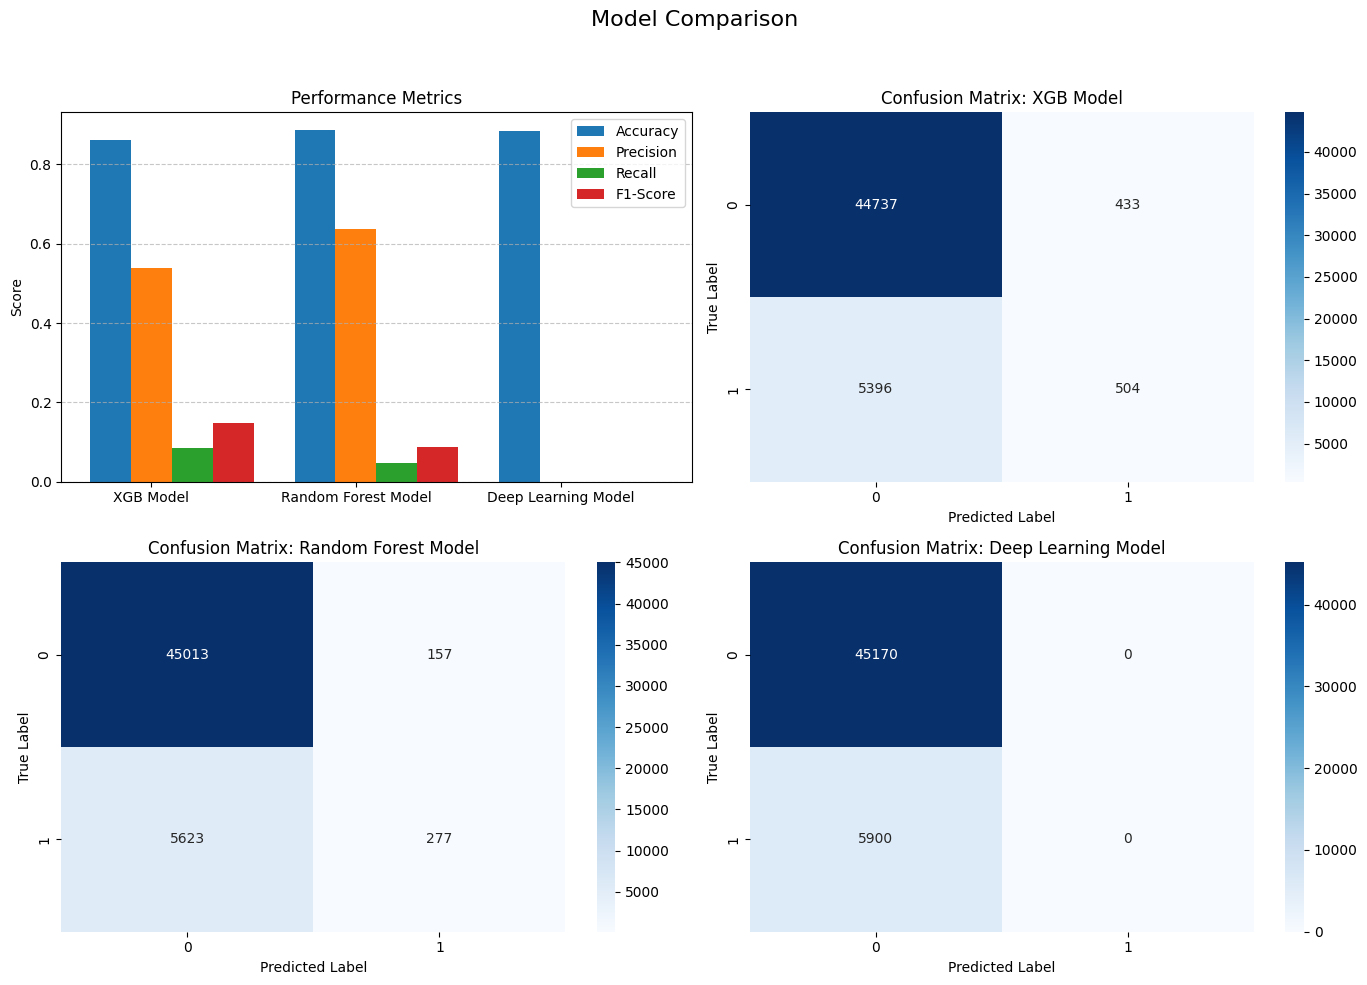

In [75]:
#Comparing the efficiencies of the various models using visualizations
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate evaluation metrics
metrics = {
    "Accuracy": [
        accuracy_xgb,
        accuracy_rf,
        accuracy_dl
    ],
    "Precision": [
        precision_score(y_test, y_pred_xgb, average="binary"),
        precision_score(y_test, y_pred_rf, average="binary"),
        precision_score(y_test, y_pred_dl, average="binary")
    ],
    "Recall": [
        recall_score(y_test, y_pred_xgb, average="binary"),
        recall_score(y_test, y_pred_rf, average="binary"),
        recall_score(y_test, y_pred_dl, average="binary")
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_xgb, average="binary"),
        f1_score(y_test, y_pred_rf, average="binary"),
        f1_score(y_test, y_pred_dl, average="binary")
    ]
}

models = ["XGB Model", "Random Forest Model", "Deep Learning Model"]

# Confusion Matrices
conf_matrices = [confusion_matrix_xgb, confusion_matrix_rf, confusion_matrix_dl]
titles = ["XGB Model", "Random Forest Model", "Deep Learning Model"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Comparison", fontsize=16)

# Bar chart for metrics
x = np.arange(len(models))  # X-axis positions
width = 0.2  # Width of bars

for i, (metric, values) in enumerate(metrics.items()):
    axes[0, 0].bar(x + i * width, values, width, label=metric)

axes[0, 0].set_title("Performance Metrics")
axes[0, 0].set_xticks(x + width)
axes[0, 0].set_xticklabels(models)
axes[0, 0].set_ylabel("Score")
axes[0, 0].legend()
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

# Heatmaps for confusion matrices
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles)):
    row, col = divmod(i + 1, 2)  # Position in subplot grid (1-based index)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[row, col])
    axes[row, col].set_title(f"Confusion Matrix: {title}")
    axes[row, col].set_xlabel("Predicted Label")
    axes[row, col].set_ylabel("True Label")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Advanced Business Insights from Differentiation

Targeted Loan Bundles for Low Risk Segments:
Borrowers earning over $100k and holding a Master's or PhD degree exhibit the lowest combined default rate (~9%). Offering premium loan bundles with lower interest rates to this segment could capture high-value, low-risk customers, increasing profitability and loyalty.

Impact: Position your institution as the go-to lender for highly qualified, affluent borrowers.


Dynamic Loan Amount Caps Based on Income Bracket:
Default rates increase sharply for loans exceeding $40k, especially in lower income brackets (e.g., 0–40k). Implement income-based loan caps that adjust dynamically to ensure the loan burden aligns with repayment ability.

Impact: Minimize defaults while maintaining inclusivity for lower-income segments.


Reevaluate Small Loan Policies:
A 100% default rate for loans under $5k suggests that borrowers use small loans for immediate relief without sufficient repayment capacity. Instead of outright rejection, offer structured alternatives like microfinance coaching or flexible repayment plans.

Impact: Transform risky small-loan applicants into long-term, responsible customers.


Incentivize Co-Signed Loans:
Loans with co-signers show 19.5% fewer defaults compared to solo applicants. Create discounted interest rates or perks for co-signed loans, especially in high-risk groups like unemployed or low-income borrowers.

Impact: Reduce defaults while expanding your lending pool to include riskier demographics.


Pre-Approval Alerts for Full-Time Employees in Lower Brackets:
Full-time employees with incomes between $40k–60k have a default rate close to high earners (~11%). Roll out proactive pre-approval offers for this group to increase engagement and acquisition of moderate-income, low-risk borrowers.

Impact: Strengthen your market share by targeting a stable, underserved population.